# TP Graph Edit Distance

## 1) GED problem visualisation :

First we have a toy problem of two graphs as follows :

In [10]:
from GED_lib import (graph_loader,path_Dijkstra,
                     draw_pair_graph,make_pair_tree,
                     draw_tree,draw_path,from_leaf_to_path)
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
g1_toy = nx.Graph()
g1_toy.add_node(0,node_label = "O")
g1_toy.add_node(1,node_label = "C")
g1_toy.add_node(2,node_label = "O")
g1_toy.add_node(3,node_label = "N")
g1_toy.add_edge(0,1,edge_label = 1)
g1_toy.add_edge(1,2,edge_label = 1)
g1_toy.add_edge(2,3,edge_label = 1)
g1_toy.add_edge(3,1,edge_label = 1)

g2_toy = nx.Graph()
g2_toy.add_node(0,node_label = "N")
g2_toy.add_node(1,node_label = "C")
g2_toy.add_node(2,node_label = "C")
g2_toy.add_edge(0,1,edge_label = 1)
g2_toy.add_edge(1,2,edge_label = 1)

(<Axes: >, <Axes: >)

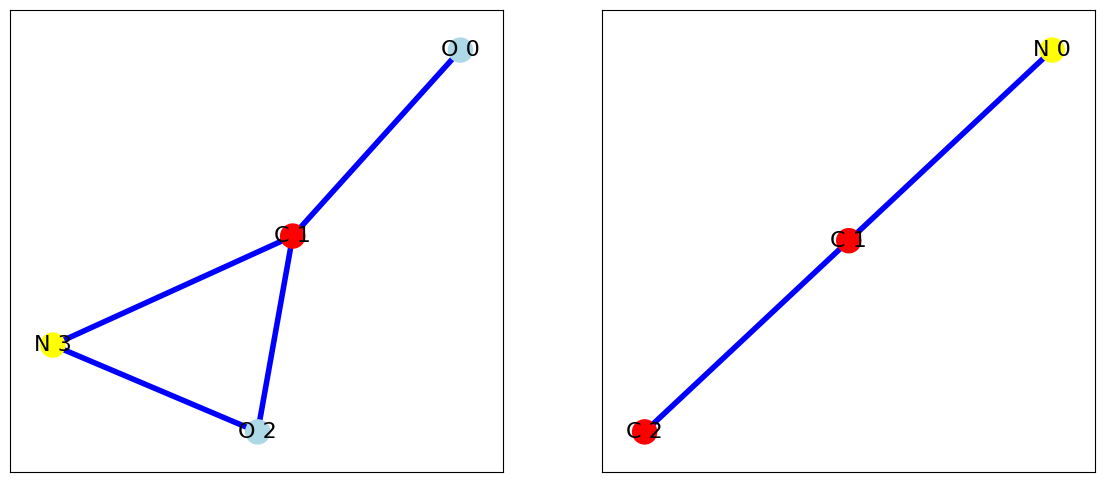

In [3]:
draw_pair_graph(g1_toy,g2_toy)

We want to compute the graph edit distance(GED) between the two graphs above.

The first simple idea to do this is to compute the tree representing the GED problem with all possible matches.

Then find a shortest path in this tree to find an optimal match corresponding to the GED value.

To compute the GED, we have 2 sets of edit operation costs defined as follows:

In [4]:
cost1 = {'n_ins':4,'n_sub':2,'n_del':4,'e_ins':1,'e_sub':1,'e_del':1}
cost2 = {'n_ins':4,'n_sub':2,'n_del':4,'e_ins':2,'e_sub':1,'e_del':2}

We can now calculate the tree, here with the cost1:

In [5]:
tree = make_pair_tree(g1_toy,g2_toy,cost1)

<Axes: >

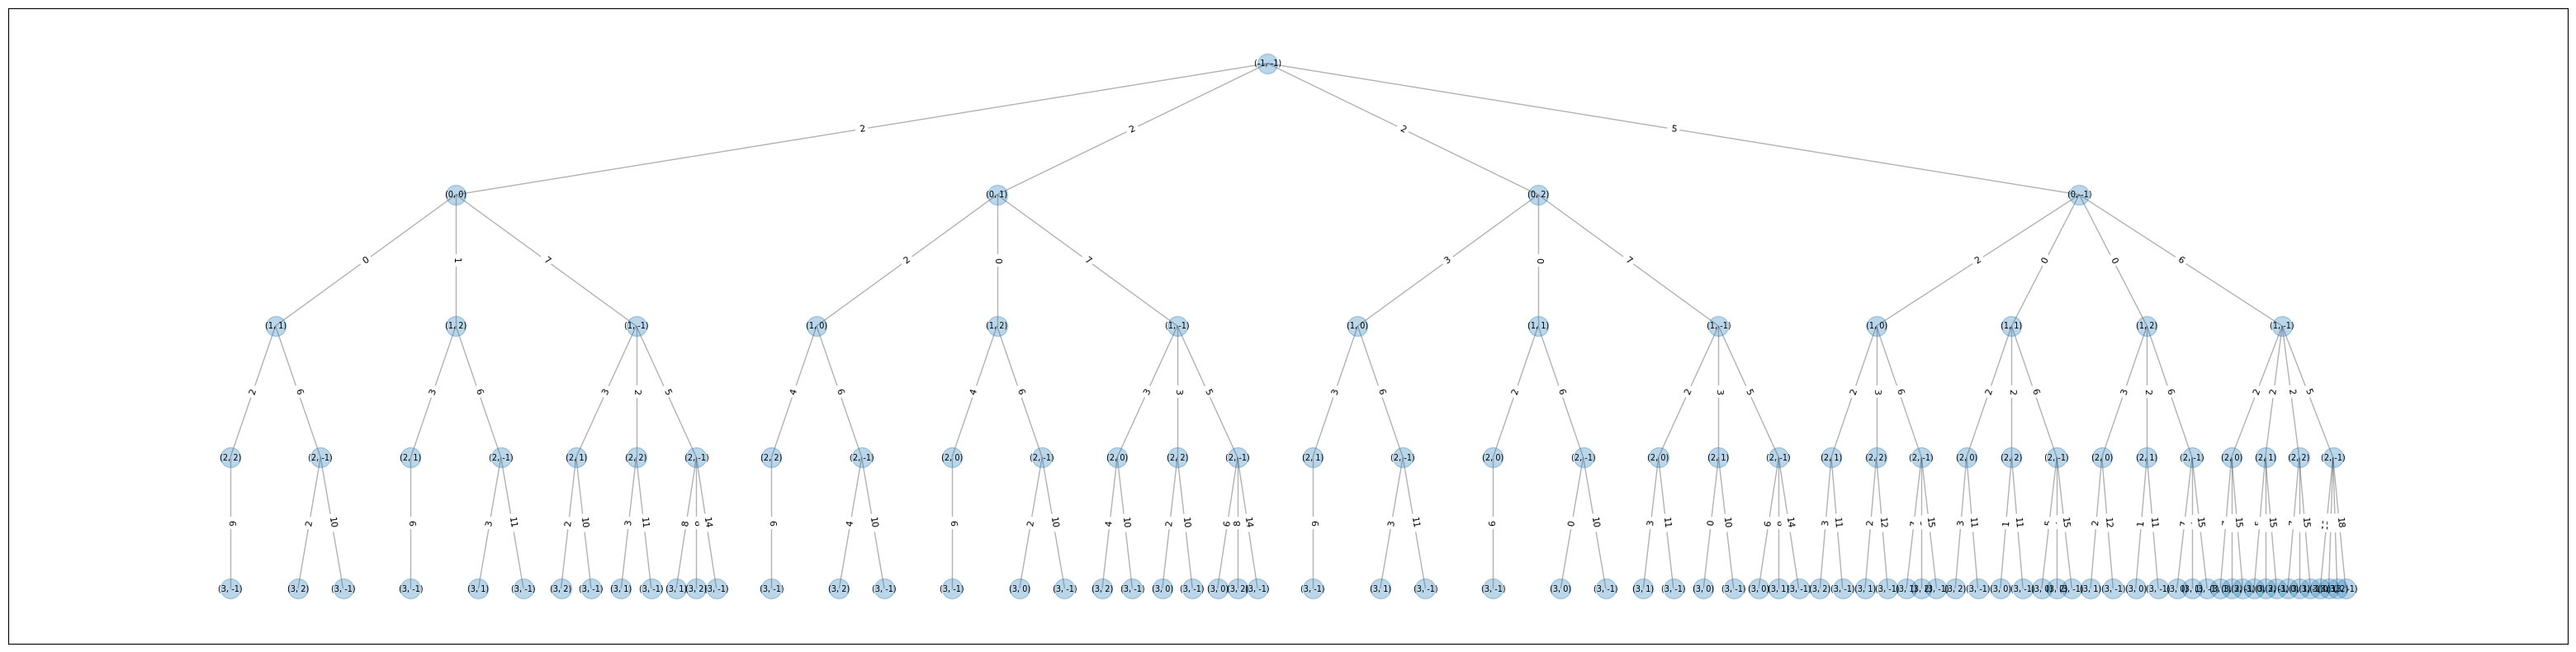

In [6]:
draw_tree(tree)

The tree above represents all possible paths to transform g1_toy into g2_toy.

We can now compute a shortest path and the cost of this path correspond to the GED value. (-1) values in a path represent either insertion or deletion.
An exemple of path : [(0,1),(-1,0),(2,-1),(3,2),(1,-1)], where the matching (i,j) is a substitution of node i whith the node j, (i,-1) a deletion of node i in the first graph and (-1,j) an insertion of node j in the second graph.
A substitution of same element have always a cost of 0 associated.

In [7]:
ged,path = path_Dijkstra(tree,g1_toy,g2_toy)
print("Graph Edit Distance value : ",ged)

Graph Edit Distance value :  8.0


In [8]:
idx_path = from_leaf_to_path(tree,path,g1_toy,g2_toy)
print("The node matching between graphs : ",idx_path)

The node matching between graphs :  [(0, 2), (1, 1), (2, -1), (3, 0)]


2 sur -1 veut dire qu'on a supprimé le noeuf 2

We get a node matching between the two graphs, which corresponds to a shortest path in the tree, all edges matching can be deduced from the node matching.

<Axes: >

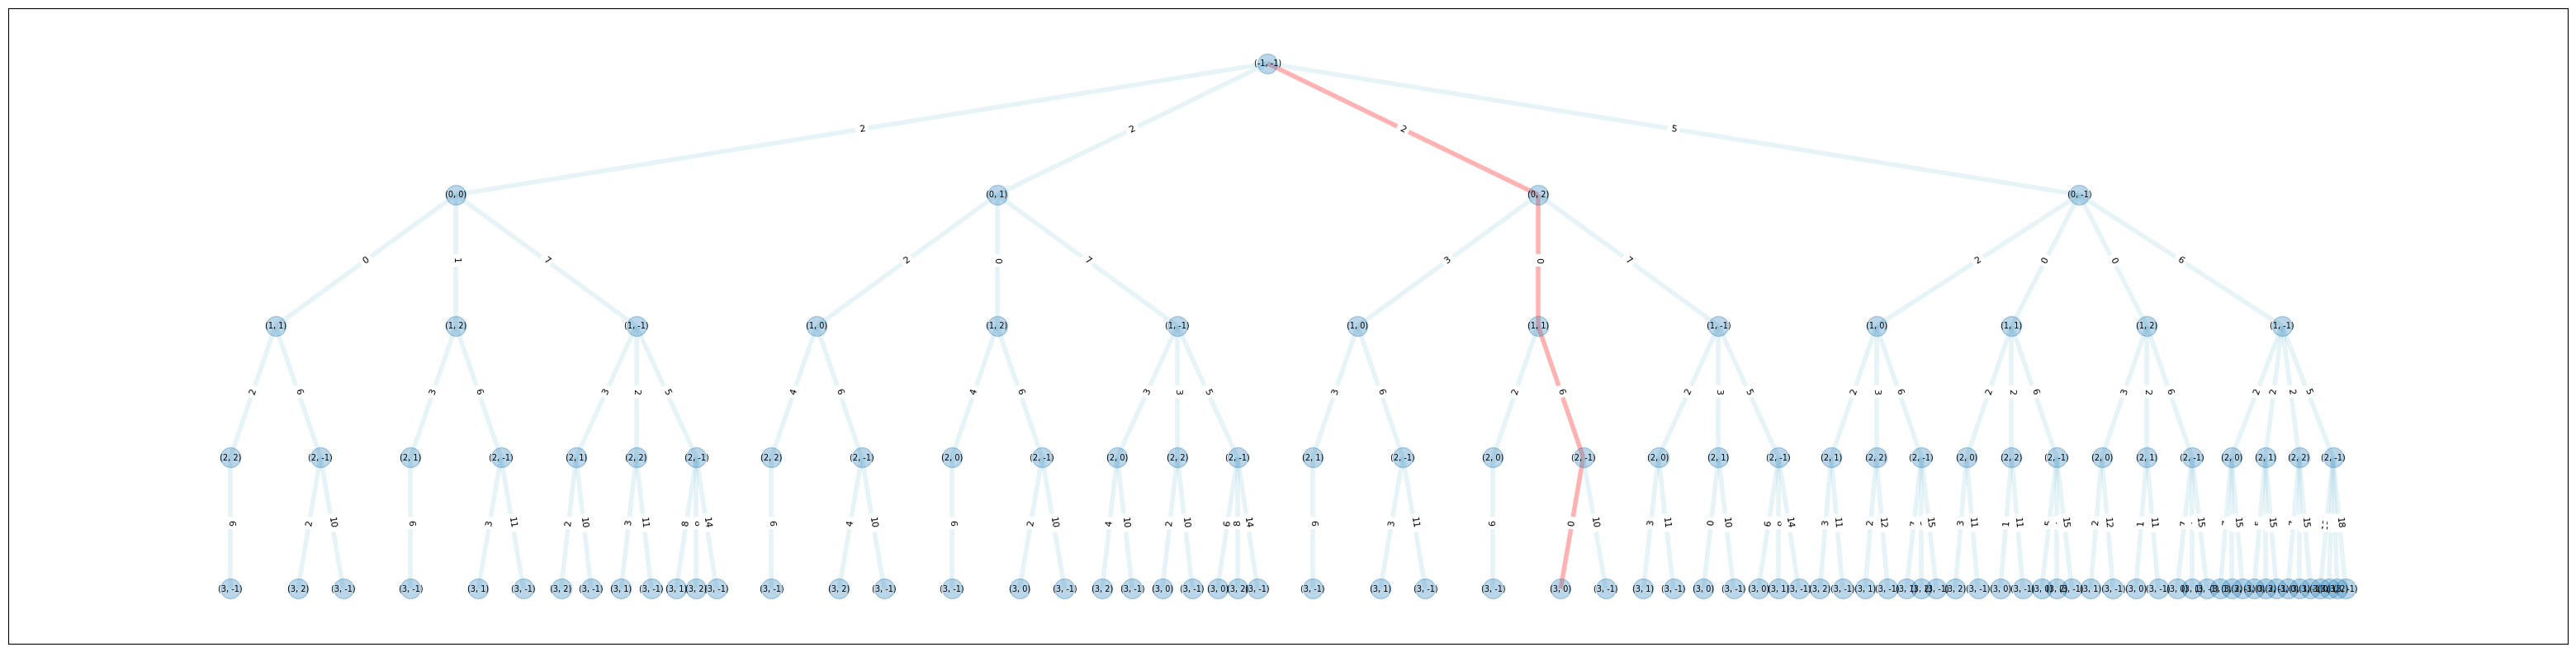

In [13]:
draw_path(tree,path)

One of the edit path that minimise the GED value is colored in red in the tree.

### Question 1) :
What are the drawbacks of this technique? and why it is not used in practise?

## 2) Astar GED :

Download the "data" file on universitice then extract its path. This file contains six graphs of chemical compounds with different atoms (nitrogen, oxygen and carbon) and different types of bonds (single, double or triple bond).

In [14]:
path = "./data"

In [15]:
data = graph_loader(path)
data

{'g0': <networkx.classes.graph.Graph at 0x150f944c9b0>,
 'g1': <networkx.classes.graph.Graph at 0x150fb92fe60>,
 'g2': <networkx.classes.graph.Graph at 0x150f96d6ff0>,
 'g3': <networkx.classes.graph.Graph at 0x150fc9a6d80>,
 'g4': <networkx.classes.graph.Graph at 0x150fc9a7dd0>,
 'g5': <networkx.classes.graph.Graph at 0x150fc9a5d30>}

You can use the draw_pair_graph() function to visualize graphs

(<Axes: >, <Axes: >)

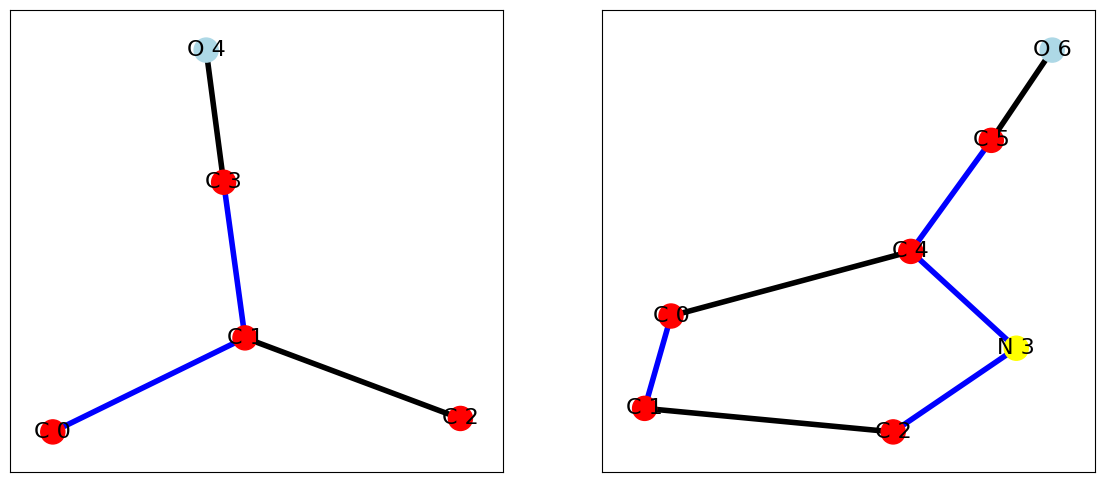

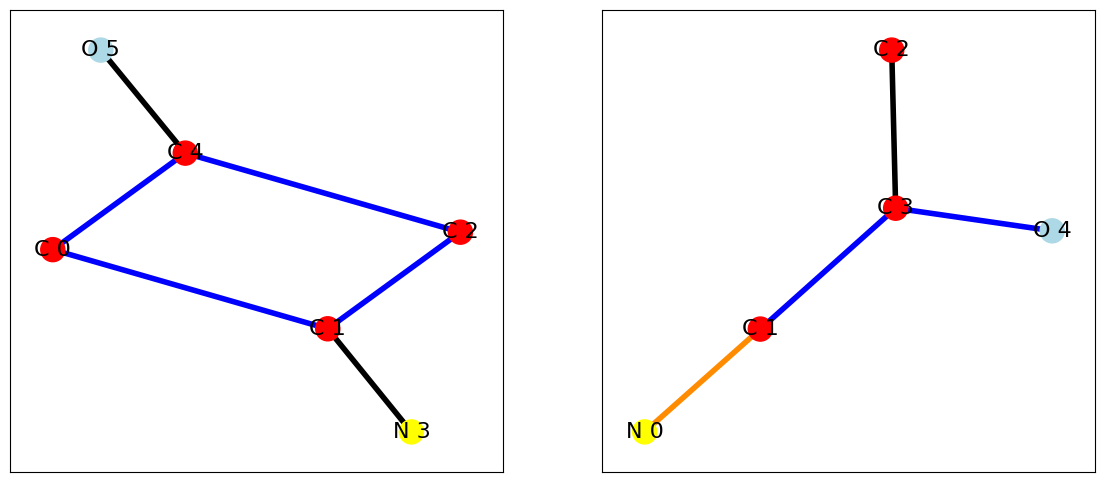

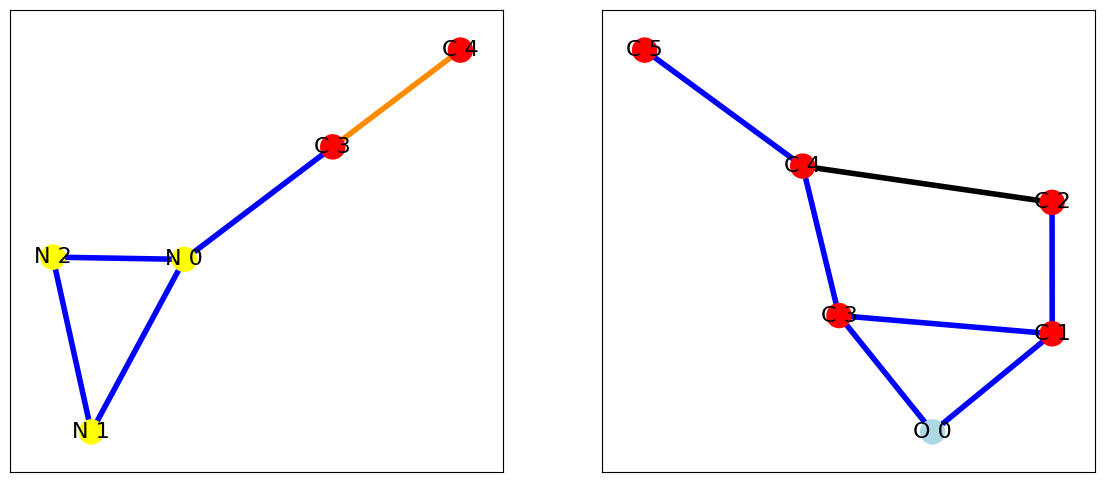

In [16]:
draw_pair_graph(data["g0"],data["g1"])
draw_pair_graph(data["g2"],data["g3"])
draw_pair_graph(data["g4"],data["g5"])

### Question 2):



First define a cost function that will compute the cost of a path. Taking account insertion, deletion and substitution of nodes and edges.

In [41]:
def cost_path(g1,g2,path,cost):
    p_cost = 0
    for i,j in path:
        if g1.has_node(i) and g2.has_node(j):
            if g1.nodes[i]['node_label'] != g2.nodes[j]['node_label']:
                p_cost += cost['n_sub']
        elif g1.has_node(i) and not g2.has_node(j):
            p_cost += cost['n_del']
        elif not g1.has_node(i) and g2.has_node(j):
            p_cost += cost['n_ins']
    return p_cost



In [42]:
cost_path(data["g0"],data["g1"],data["g0"].edges,cost1)

2

We also need a function that verify if a path is complete or not.

In [ ]:
def is_complete(g1,g2,path):
    return False

Eventually the A* core function.

In [20]:
def A_star(g1,g2,cost):
    return(ged,path)

Check your A* function and your cost function for the toy problem and the six graphs for cost1 using the table with GED values above.

|Graph1| 	Graph2| 	GED_cost1|
| :--------------- |:---------------:| -----:|
| 	0|	1|	13.0|
| 	0| 	2| 	8.0|
| 	0| 	3| 	5.0|
| 	0| 	4| 	10.0|
| 	0| 	5| 	8.0|
| 	1| 	2| 	10.0|
|	1|	3| 	15.0|
|  1| 	4| 	17.0|
| 	1| 	5| 	11.0|
| 	2| 	3| 	10.0|
| 2| 	4| 	13.0|
| 2| 	5| 	6.0|
| 3| 	4| 	9.0|
| 3| 	5| 	11.0|
| 4| 	5| 	13.0|